# Project Spint 2

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
df =  pd.read_csv(r"C:\Users\Letitia\Documents\YORK UNIVERSITY\CSDA1100 Data Analytics for Business - Blended Winter 2024 Offering 1\WEEK 4\baseball_teams - Copie.csv")

In [4]:
# read data into a DataFrame
df.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


In [5]:
#We drop the Unnamed columns to clean the dataset
df = df.drop(['Unnamed: 7', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

In [6]:
#We remmove the space after the column "Year "

df = df.rename(columns={"Year ": "Year"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2805 non-null   int64  
 1   League               2755 non-null   object 
 2   Team                 2805 non-null   object 
 3   Franchise            2805 non-null   object 
 4   Division             1288 non-null   object 
 5   Final_Standing       2805 non-null   int64  
 6   Games_Played         2805 non-null   int64  
 7   Games_Won            2805 non-null   int64  
 8   Games_Lost           2805 non-null   int64  
 9   League_Win           2777 non-null   object 
 10  World_Series         2448 non-null   object 
 11  Runs_Scored          2805 non-null   int64  
 12  At_Bats              2805 non-null   int64  
 13  Hits                 2805 non-null   int64  
 14  Doubles              2805 non-null   int64  
 15  Triples              2805 non-null   i

In [7]:
#Total of null values per column
df.isnull().sum()

Year                      0
League                   50
Team                      0
Franchise                 0
Division               1517
Final_Standing            0
Games_Played              0
Games_Won                 0
Games_Lost                0
League_Win               28
World_Series            357
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed             0
Strikeouts_Allowed        0
Errors                    0
Double_Plays        

In [8]:
# dropping missing colums values which are not important for our analysis

df.drop(columns='League', inplace=True)
df.drop(columns='Division', inplace=True)
df.drop(columns='League_Win', inplace=True)
df.drop(columns='World_Series', inplace=True)
df.drop(columns='Home_Ball_Park', inplace=True)
df.drop(columns='Attendance', inplace=True)

In [ ]:
print(df.shape)
print(df.isnull().sum())

(2805, 34)
Year                      0
Team                      0
Franchise                 0
Final_Standing            0
Games_Played              0
Games_Won                 0
Games_Lost                0
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed             0
Strikeouts_Allowed        0
Errors                    0
Double_Plays            317
Fielding_Percentage       0
Team_Name                 0
dtype: int64


In [ ]:
#replacing null values in the remaining column by median of each column

df['Strike_Outs'].replace([np.nan], df['Strike_Outs'].median(), inplace=True)
df['Stolen_Bases'].replace([np.nan], df['Stolen_Bases'].median(), inplace=True)
df['Caught_Stealing'].replace([np.nan], df['Caught_Stealing'].median(), inplace=True)
df['Hit_By_Pitch'].replace([np.nan], df['Hit_By_Pitch'].median(), inplace=True)
df['Sacrifice_Fly'].replace([np.nan], df['Sacrifice_Fly'].median(), inplace=True)
df['Double_Plays'].replace([np.nan], df['Double_Plays'].median(), inplace=True)

df

,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
0,1871,BS1,BNA,3,31,20,10,401,1372,426,...,3,828,367,2,42,23,225,145.0,0.830,Boston Red Stockings
1,1871,CH1,CNA,2,28,19,9,302,1196,323,...,1,753,308,6,28,22,218,145.0,0.820,Chicago White Stockings
2,1871,CL1,CFC,8,29,10,19,249,1186,328,...,0,762,346,13,53,34,223,145.0,0.810,Cleveland Forest Citys
3,1871,FW1,KEK,7,19,7,12,137,746,178,...,0,507,261,5,21,17,163,145.0,0.800,Fort Wayne Kekiongas
4,1871,NY2,NNA,5,33,16,17,302,1404,403,...,0,879,373,7,42,22,227,145.0,0.830,New York Mutuals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,LAN,LAD,1,162,92,70,667,5385,1346,...,47,4337,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers
2801,2015,SFN,SFG,2,162,84,78,696,5565,1486,...,41,4333,1344,155,431,1165,78,145.0,0.987,San Francisco Giants
2802,2015,ARI,ARI,3,162,79,83,720,5649,1494,...,44,4400,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks
2803,2015,SDN,SDP,4,162,74,88,650,5457,1324,...,41,4321,1371,171,516,1393,92,138.0,0.985,San Diego Padres


In [9]:
print(df.shape)
print(df.isnull().sum())

(2805, 34)
Year                      0
Team                      0
Franchise                 0
Final_Standing            0
Games_Played              0
Games_Won                 0
Games_Lost                0
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed             0
Strikeouts_Allowed        0
Errors                    0
Double_Plays            317
Fielding_Percentage       0
Team_Name                 0
dtype: int64


In [10]:
df.head()


,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
0,1871,BS1,BNA,3,31,20,10,401,1372,426,...,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings
1,1871,CH1,CNA,2,28,19,9,302,1196,323,...,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings
2,1871,CL1,CFC,8,29,10,19,249,1186,328,...,0,762,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys
3,1871,FW1,KEK,7,19,7,12,137,746,178,...,0,507,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas
4,1871,NY2,NNA,5,33,16,17,302,1404,403,...,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals


# **We first make some correlations to guest wich predictors could be related to the response :  Games Won**

C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


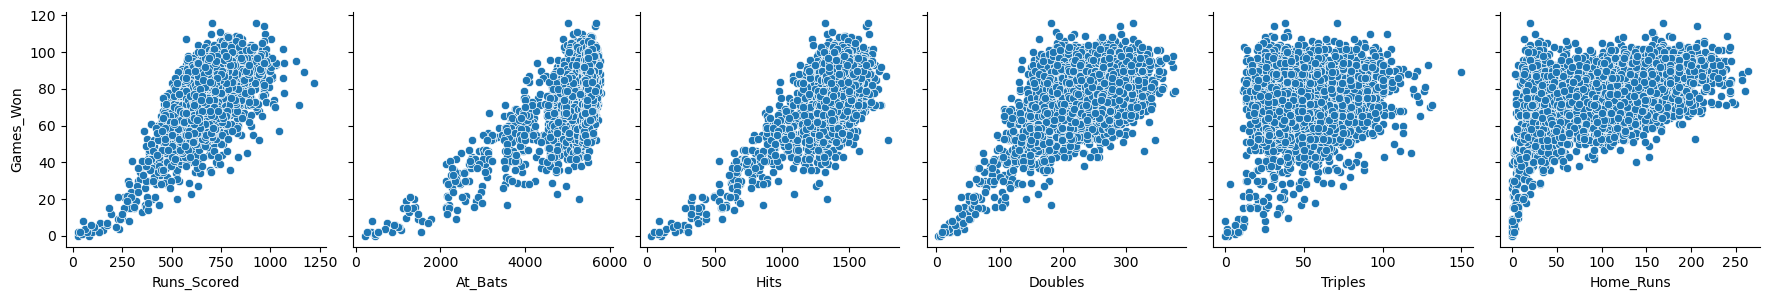

In [11]:
# visualize the relationship between the first part of offensive measures and Game won using scatterplots

sns.pairplot(df, x_vars=['Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs'], y_vars='Games_Won', size=3)

C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


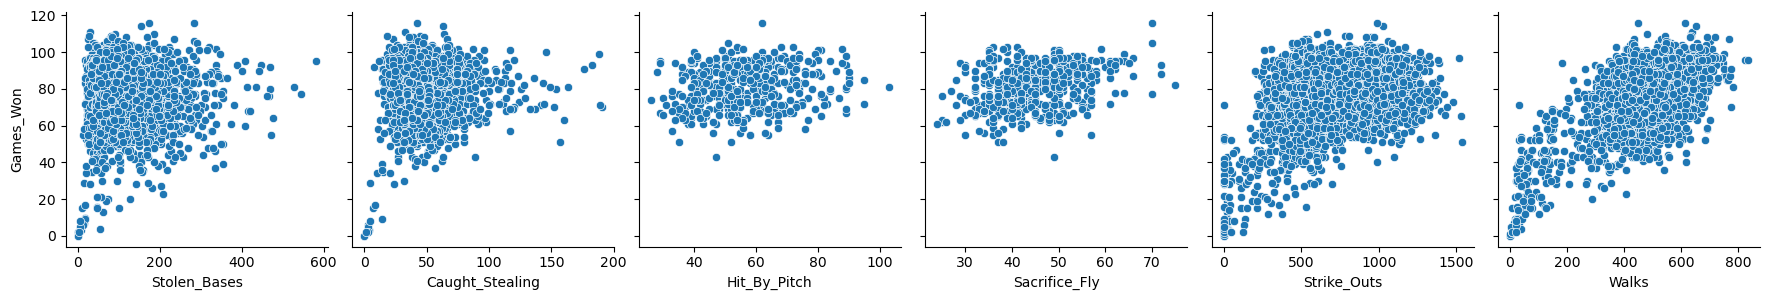

In [12]:
# visualize the relationship between the second part of defensive measures and Game won using scatterplots

sns.pairplot(df, x_vars=['Stolen_Bases','Caught_Stealing',
                           'Hit_By_Pitch','Sacrifice_Fly', 'Strike_Outs', 'Walks'], y_vars='Games_Won', size=3)

C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


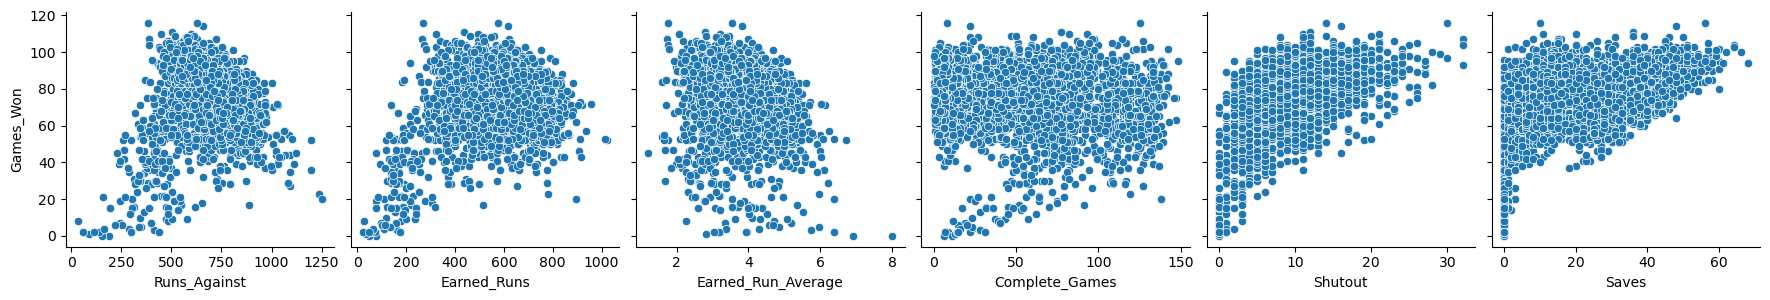

In [13]:
# visualize the relationship between the first part of defensive measures and Game won using scatterplots

sns.pairplot(df, x_vars=['Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games',
                           'Shutout','Saves'], y_vars='Games_Won', size=3)

C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Letitia\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


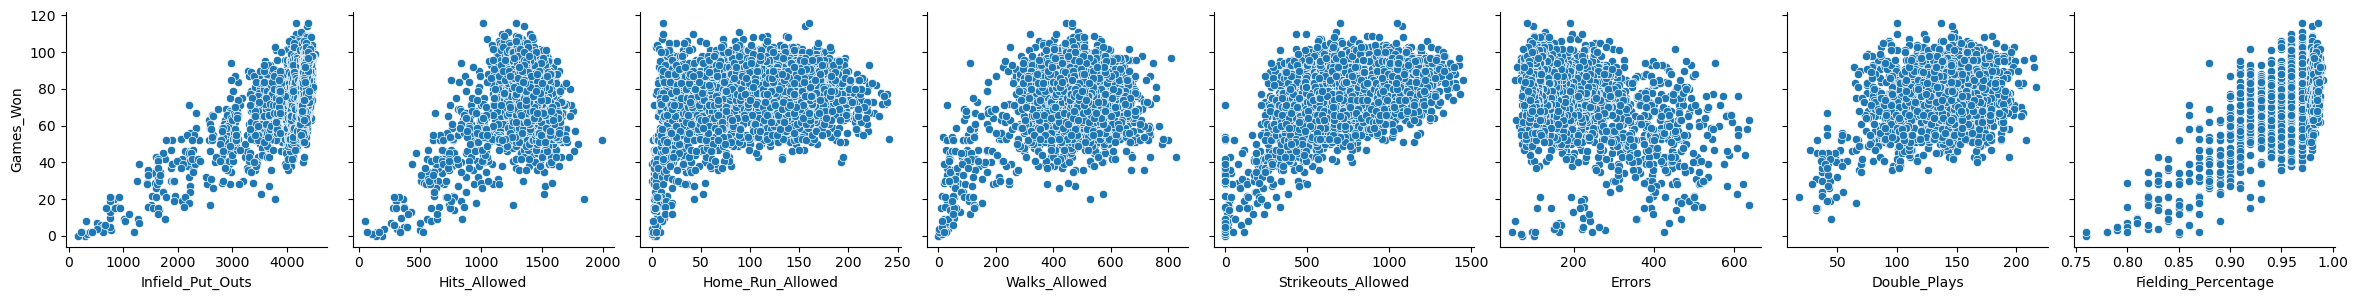

In [15]:
# visualize the relationship between the second part of defensive measures and Game won using scatterplots

sns.pairplot(df, x_vars=['Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed','Walks_Allowed',
                           'Strikeouts_Allowed','Errors','Double_Plays','Fielding_Percentage' ], y_vars='Games_Won', size=3)


# If we decided to select the predictors only based on the visualisations we could select the predictors: Runs Scored, At Bats, Hits, Doubles, Walks, Strike Outs, Infield Put Outs, Hits Allowed, Strikeouts Allowed, Fielding, Percentage because they have a correlation with Games Won.  

In [16]:
df = df.rename(columns={"Team ": "Team"})

In [17]:
#define "Team" as the index
df.set_index('Team')

,Year,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
Team,,,,,,,,,,,,,,,,,,,,,
BS1,1871,BNA,3,31,20,10,401,1372,426,70,...,3,828,367,2,42,23,225,NaN,0.830,Boston Red Stockings
CH1,1871,CNA,2,28,19,9,302,1196,323,52,...,1,753,308,6,28,22,218,NaN,0.820,Chicago White Stockings
CL1,1871,CFC,8,29,10,19,249,1186,328,35,...,0,762,346,13,53,34,223,NaN,0.810,Cleveland Forest Citys
FW1,1871,KEK,7,19,7,12,137,746,178,19,...,0,507,261,5,21,17,163,NaN,0.800,Fort Wayne Kekiongas
NY2,1871,NNA,5,33,16,17,302,1404,403,43,...,0,879,373,7,42,22,227,NaN,0.830,New York Mutuals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAN,2015,LAD,1,162,92,70,667,5385,1346,263,...,47,4337,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers
SFN,2015,SFG,2,162,84,78,696,5565,1486,288,...,41,4333,1344,155,431,1165,78,145.0,0.987,San Francisco Giants
ARI,2015,ARI,3,162,79,83,720,5649,1494,289,...,44,4400,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks


#MODEL FROM 1871

In [19]:
# Select the training and test data sets from the original data. Note 30% of the data is selected testing and 70% for training
x_train, x_test, y_train, y_test = train_test_split(df, df['Games_Won'],test_size=0.3, random_state=0)

In [20]:
x_train.set_index('Team')

,Year,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
Team,,,,,,,,,,,,,,,,,,,,,
CHA,1996,CHW,2,162,85,77,898,5644,1586,284,...,43,4383,1529,174,616,1039,109,145.0,0.980,Chicago White Sox
MIL,2003,MIL,6,162,68,94,714,5548,1423,266,...,44,4356,1590,219,575,1034,114,142.0,0.981,Milwaukee Brewers
COL,1995,COL,2,144,77,67,785,4994,1406,259,...,43,3864,1443,160,512,891,107,146.0,0.980,Colorado Rockies
PIT,1925,PIT,1,153,95,58,912,5372,1651,316,...,13,4062,1526,81,387,386,224,171.0,0.960,Pittsburgh Pirates
NY1,1922,SFG,1,156,93,61,852,5454,1661,253,...,15,4188,1454,71,393,388,194,145.0,0.970,New York Giants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIT,1923,PIT,3,154,87,67,786,5405,1592,224,...,9,4128,1513,53,402,414,179,157.0,0.970,Pittsburgh Pirates
CHN,1928,CHC,3,154,91,63,714,5260,1460,251,...,14,4140,1383,56,508,531,156,176.0,0.970,Chicago Cubs
NYN,1974,NYM,5,162,71,91,572,5468,1286,183,...,14,4410,1433,99,504,908,158,150.0,0.970,New York Mets


In [21]:
x_test.set_index('Team')

,Year,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
Team,,,,,,,,,,,,,,,,,,,,,
NY1,1929,SFG,3,152,84,67,897,5388,1594,251,...,13,4116,1536,102,387,431,158,163.0,0.970,New York Giants
BLF,1915,BLT,8,154,47,107,550,5060,1235,196,...,7,4080,1455,52,466,570,273,140.0,0.950,Baltimore Terrapins
BFN,1879,BUF,3,79,46,32,394,2906,733,105,...,0,2139,698,3,47,198,331,62.0,0.900,Buffalo Bisons
BRO,1898,LAD,10,149,54,91,638,5126,1314,156,...,0,3894,1446,34,476,294,334,NaN,0.940,Brooklyn Bridegrooms
NY4,1883,NYP,4,97,54,42,498,3534,883,111,...,0,2622,749,12,123,480,391,NaN,0.900,New York Metropolitans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRO,1933,LAD,6,157,65,88,617,5367,1413,224,...,10,4158,1502,51,374,415,177,120.0,0.970,Brooklyn Dodgers
NYA,1988,NYY,5,161,85,76,772,5592,1469,272,...,43,4368,1512,157,487,861,134,161.0,0.970,New York Yankees
BR3,1888,LAD,2,143,88,52,758,4871,1177,172,...,0,3858,1059,15,285,577,502,NaN,0.910,Brooklyn Bridegrooms


In [22]:
#Calculate descriptive statistics for the training data set
x_train.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,...,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1741.000000,1963.000000
mean,1955.253693,4.123281,150.409577,74.751401,74.831890,681.867550,5144.333673,1346.448293,227.601121,47.055018,...,9.653082,23.760571,4024.274070,1345.868569,101.642384,474.424860,734.880285,186.578706,139.794945,0.961456
std,41.443031,2.328760,23.233543,17.793851,17.563871,135.169063,751.160850,219.535177,58.215725,22.063342,...,5.145525,16.253338,631.315122,219.773438,58.033800,132.415291,297.041006,107.955555,29.638432,0.030333
min,1871.000000,1.000000,6.000000,0.000000,6.000000,24.000000,211.000000,33.000000,3.000000,0.000000,...,0.000000,0.000000,162.000000,72.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000
25%,1920.000000,2.000000,154.000000,66.000000,65.000000,612.000000,5128.500000,1298.500000,193.000000,31.000000,...,6.000000,9.000000,4074.000000,1288.000000,47.000000,427.000000,502.500000,116.500000,126.000000,0.960000
50%,1964.000000,4.000000,157.000000,77.000000,76.000000,690.000000,5394.000000,1393.000000,230.000000,41.000000,...,9.000000,24.000000,4242.000000,1392.000000,110.000000,495.000000,741.000000,145.000000,144.000000,0.970000
75%,1991.000000,6.000000,162.000000,87.500000,87.000000,764.000000,5518.000000,1467.500000,270.000000,60.000000,...,13.000000,38.000000,4341.000000,1470.000000,148.000000,554.000000,972.000000,216.000000,159.000000,0.980000
max,2015.000000,13.000000,165.000000,116.000000,134.000000,1220.000000,5781.000000,1769.000000,373.000000,130.000000,...,32.000000,68.000000,4518.000000,1844.000000,241.000000,827.000000,1437.000000,639.000000,217.000000,0.989000


In [23]:
#Calculate descriptive statistics for the test data set
x_test.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,747.000000,842.000000
mean,1954.530879,4.070071,150.204276,74.743468,74.555819,682.128266,5138.199525,1345.865796,227.680523,47.218527,...,9.690024,23.451306,4017.975059,1346.585511,99.957245,473.045131,722.717340,185.774347,141.099063,0.961664
std,41.716153,2.311854,23.225741,17.287820,16.945737,137.136644,749.557990,220.850550,59.824546,22.752867,...,4.986080,16.353937,630.607459,219.061164,58.752170,130.730456,294.933638,107.021024,28.572251,0.029985
min,1871.000000,1.000000,12.000000,1.000000,4.000000,45.000000,395.000000,81.000000,9.000000,0.000000,...,0.000000,0.000000,312.000000,49.000000,0.000000,10.000000,0.000000,53.000000,27.000000,0.790000
25%,1919.000000,2.000000,153.000000,66.000000,65.000000,616.250000,5124.500000,1304.250000,192.000000,30.000000,...,6.000000,9.000000,4077.000000,1290.250000,44.500000,429.000000,499.000000,116.000000,127.000000,0.960000
50%,1960.500000,4.000000,156.500000,78.000000,76.000000,689.000000,5377.500000,1392.500000,232.000000,41.500000,...,9.000000,23.000000,4215.000000,1392.000000,107.000000,493.000000,721.000000,146.000000,145.000000,0.970000
75%,1992.000000,5.000000,162.000000,86.750000,86.000000,760.000000,5514.750000,1467.000000,271.000000,61.000000,...,13.000000,38.000000,4338.000000,1471.000000,148.000000,555.000000,954.750000,218.000000,160.000000,0.980000
max,2015.000000,13.000000,165.000000,116.000000,113.000000,1171.000000,5757.000000,1783.000000,376.000000,150.000000,...,32.000000,66.000000,4469.000000,1993.000000,228.000000,748.000000,1450.000000,624.000000,206.000000,0.991000


In [24]:
# Identify non-numeric columns

non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

In [25]:
# Compute correlation coefficients
df_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.293981,0.601304,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,-0.610569,...,0.095318,0.897888,0.617324,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934
Final_Standing,-0.293981,1.000000,-0.171295,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,0.065342,...,-0.380173,-0.403732,-0.202563,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955
Games_Played,0.601304,-0.171295,1.000000,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,0.002071,...,0.351139,0.525381,0.996585,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709
Games_Won,0.418790,-0.732510,0.676371,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,0.086865,...,0.545568,0.505623,0.697276,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387
Games_Lost,0.425112,0.502550,0.661355,-0.102111,1.000000,0.028576,0.632149,0.436382,0.339586,-0.122844,...,-0.090116,0.232377,0.637079,0.741285,0.453769,0.667285,0.364530,-0.267573,0.354396,0.521540
Runs_Scored,0.273367,-0.447966,0.532620,0.677243,0.028576,1.000000,0.618912,0.801701,0.692903,0.252232,...,-0.005953,0.301986,0.519478,0.594606,0.387560,0.468324,0.307831,-0.131307,0.474370,0.411579
At_Bats,0.605436,-0.199481,0.986522,0.689233,0.632149,0.618912,1.000000,0.919542,0.736695,0.015327,...,0.295969,0.531993,0.984474,0.884420,0.578579,0.777466,0.633544,-0.480204,0.667970,0.845304
Hits,0.506059,-0.306493,0.867794,0.725160,0.436382,0.801701,0.919542,1.000000,0.817653,0.152675,...,0.188116,0.454741,0.862981,0.867496,0.515793,0.698237,0.489808,-0.433909,0.611877,0.759347
Doubles,0.683101,-0.364275,0.679297,0.586949,0.339586,0.692903,0.736695,0.817653,1.000000,-0.134633,...,0.051027,0.609095,0.680553,0.722018,0.662841,0.595325,0.615098,-0.569944,0.512153,0.711360
Triples,-0.610569,0.065342,0.002071,0.086865,-0.122844,0.252232,0.015327,0.152675,-0.134633,1.000000,...,0.046151,-0.561035,-0.018220,0.061313,-0.561817,-0.098806,-0.498158,0.526120,-0.215363,-0.216957


In [26]:
#correlation coefficients between all the variables and Games Won since 1871
df_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.293981,0.601304,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,-0.610569,...,0.095318,0.897888,0.617324,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934
Final_Standing,-0.293981,1.000000,-0.171295,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,0.065342,...,-0.380173,-0.403732,-0.202563,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955
Games_Played,0.601304,-0.171295,1.000000,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,0.002071,...,0.351139,0.525381,0.996585,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709
Games_Won,0.418790,-0.732510,0.676371,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,0.086865,...,0.545568,0.505623,0.697276,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387
Games_Lost,0.425112,0.502550,0.661355,-0.102111,1.000000,0.028576,0.632149,0.436382,0.339586,-0.122844,...,-0.090116,0.232377,0.637079,0.741285,0.453769,0.667285,0.364530,-0.267573,0.354396,0.521540
Runs_Scored,0.273367,-0.447966,0.532620,0.677243,0.028576,1.000000,0.618912,0.801701,0.692903,0.252232,...,-0.005953,0.301986,0.519478,0.594606,0.387560,0.468324,0.307831,-0.131307,0.474370,0.411579
At_Bats,0.605436,-0.199481,0.986522,0.689233,0.632149,0.618912,1.000000,0.919542,0.736695,0.015327,...,0.295969,0.531993,0.984474,0.884420,0.578579,0.777466,0.633544,-0.480204,0.667970,0.845304
Hits,0.506059,-0.306493,0.867794,0.725160,0.436382,0.801701,0.919542,1.000000,0.817653,0.152675,...,0.188116,0.454741,0.862981,0.867496,0.515793,0.698237,0.489808,-0.433909,0.611877,0.759347
Doubles,0.683101,-0.364275,0.679297,0.586949,0.339586,0.692903,0.736695,0.817653,1.000000,-0.134633,...,0.051027,0.609095,0.680553,0.722018,0.662841,0.595325,0.615098,-0.569944,0.512153,0.711360
Triples,-0.610569,0.065342,0.002071,0.086865,-0.122844,0.252232,0.015327,0.152675,-0.134633,1.000000,...,0.046151,-0.561035,-0.018220,0.061313,-0.561817,-0.098806,-0.498158,0.526120,-0.215363,-0.216957


In [27]:
#building of a model with highest variables correlated with Games Won from 1871
lm1 = smf.ols(formula="Games_Won ~ Hits + Infield_Put_Outs -1", data=x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          3.791e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:37:32   Log-Likelihood:                         -7695.8
No. Observations:                1963   AIC:                                  1.540e+04
Df Residuals:                    1961   BIC:                                  1.541e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Hits                 0.0369      0.002     14.983      0.000       0.032       0.042
Infield_Put_Outs     0.0063      0.001      7.628      0.000       0.005       0.008
==============================================================================
Omnibus:                        9.664   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.710
Skew:                          -0.172   Prob(JB):                      0.00779
Kurtosis:                       3.009   Cond. No.                         40.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r2 is high and the p-value is close to zero which is good.

In [28]:
#Test the model by predicting Games Won using dependent variables from the "test" data set
lm1_predict=lm1.predict(x_test)

In [29]:
lm1_predict.describe()

count    842.000000
mean      74.895729
std       11.722684
min        5.099740
25%       73.739215
50%       77.821859
75%       80.942379
max       91.632272
dtype: float64

In [30]:
#Create a new dataframe "predict_values" to keep track of the actual and predicted values to calculate the residuals

predict_values=pd.concat([x_test["Games_Won"], x_test['Team'],lm1_predict],axis=1).set_index('Team')
predict_values.columns=["actual_games_won","predicted_games_won"]
predict_values["residual"]=predict_values["actual_games_won"]-predict_values["predicted_games_won"]

In [31]:
predict_values.head()

,actual_games_won,predicted_games_won,residual
Team,,,
NY1,84,84.662527,-0.662527
BLF,47,71.197337,-24.197337
BFN,46,40.480451,5.519549
BRO,54,72.941083,-18.941083
NY4,54,49.049010,4.950990


In [32]:
mae=metrics.mean_absolute_error(predict_values['actual_games_won'], predict_values['predicted_games_won'])
mse=metrics.mean_squared_error(predict_values['actual_games_won'], predict_values['predicted_games_won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_games_won'], predict_values['predicted_games_won']))

In [33]:
print ('mean absolute error', mae)

mean absolute error 9.134532380150215


In [34]:
print ('mean squared error', mse)

mean squared error 129.7872294464972


In [35]:
print ('root mean squared error', rmse)

root mean squared error 11.392419824010052


# MODEL BEFORE 1920

In [36]:
#We filter our subset before 1920. New name df1920
df_1920 = df[(df['Year'] < 1920)]

df_1920

,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
0,1871,BS1,BNA,3,31,20,10,401,1372,426,...,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings
1,1871,CH1,CNA,2,28,19,9,302,1196,323,...,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings
2,1871,CL1,CFC,8,29,10,19,249,1186,328,...,0,762,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys
3,1871,FW1,KEK,7,19,7,12,137,746,178,...,0,507,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas
4,1871,NY2,NNA,5,33,16,17,302,1404,403,...,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1919,PHI,PHI,8,138,47,90,510,4746,1191,...,2,3756,1391,40,408,397,219,112.0,0.96,Philadelphia Phillies
699,1919,PIT,PIT,4,139,71,68,472,4538,1132,...,4,3747,1113,23,263,391,160,89.0,0.96,Pittsburgh Pirates
700,1919,SLA,BAL,5,140,67,72,533,4672,1234,...,4,3768,1255,35,421,415,214,98.0,0.96,St. Louis Browns
701,1919,SLN,STL,7,138,54,83,463,4588,1175,...,8,3651,1146,25,415,414,217,112.0,0.96,St. Louis Cardinals


In [37]:
# Convert non-numeric columns to numeric if possible
df_1920_numeric = df_1920.apply(pd.to_numeric, errors='coerce')

In [38]:
# Remove non-numeric columns
df_1920_numeric = df_1920_numeric.dropna(axis=1)

In [39]:
#correlation coefficients between all the variables and Games Won before 1920

df_1920_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Complete_Games,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Fielding_Percentage
Year,1.000000,-0.082193,0.802923,0.602368,0.620393,0.170307,0.735271,0.655431,0.562873,0.424524,...,0.232261,0.627117,0.676590,0.821519,0.664930,0.230242,0.679998,0.676153,-0.549536,0.878291
Final_Standing,-0.082193,1.000000,-0.108053,-0.635882,0.489376,-0.335152,-0.131851,-0.225380,-0.311365,-0.178688,...,-0.071234,-0.462850,-0.277237,-0.136902,0.121449,0.159822,0.095441,-0.242680,0.186997,-0.234411
Games_Played,0.802923,-0.108053,1.000000,0.765999,0.745224,0.564020,0.987764,0.905877,0.760180,0.666072,...,0.701214,0.553754,0.481929,0.997586,0.900834,0.464565,0.834464,0.798978,-0.087397,0.880804
Games_Won,0.602368,-0.635882,0.765999,1.000000,0.144745,0.681313,0.775265,0.808361,0.749308,0.644800,...,0.553754,0.673471,0.526227,0.779830,0.555890,0.243336,0.532710,0.695112,-0.199159,0.752685
Games_Lost,0.620393,0.489376,0.745224,0.144745,1.000000,0.160974,0.716733,0.558298,0.397839,0.362214,...,0.498868,0.156623,0.202158,0.727625,0.811717,0.464053,0.732441,0.506540,0.065033,0.580469
Runs_Scored,0.170307,-0.335152,0.564020,0.681313,0.160974,1.000000,0.659766,0.809644,0.756382,0.750391,...,0.642861,0.067464,0.140634,0.544808,0.632833,0.558037,0.556296,0.334195,0.333870,0.395619
At_Bats,0.735271,-0.131851,0.987764,0.775265,0.716733,0.659766,1.000000,0.946003,0.802197,0.712543,...,0.746686,0.490849,0.427719,0.983225,0.918925,0.510169,0.830906,0.760765,0.004864,0.848008
Hits,0.655431,-0.225380,0.905877,0.808361,0.558298,0.809644,0.946003,1.000000,0.875189,0.787124,...,0.702275,0.393214,0.406667,0.898052,0.896290,0.541807,0.788433,0.631432,0.003521,0.790960
Doubles,0.562873,-0.311365,0.760180,0.749308,0.397839,0.756382,0.802197,0.875189,1.000000,0.676356,...,0.562868,0.355533,0.389172,0.756859,0.753645,0.494058,0.654073,0.587034,0.004483,0.685504
Triples,0.424524,-0.178688,0.666072,0.644800,0.362214,0.750391,0.712543,0.787124,0.676356,1.000000,...,0.563087,0.206186,0.272724,0.655342,0.679766,0.444315,0.625115,0.460045,0.086207,0.558020


In [40]:
# Select the training and test data sets from the original data. Note 30% of the data is selected testing and 70% for training

x_train, x_test, y_train, y_test = train_test_split(df_1920, df_1920['Games_Won'],test_size=0.3, random_state=0)

In [41]:
#Calculate descriptive statistics for the training data set
x_train.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,273.000000,492.000000
mean,1897.184959,4.973577,127.711382,62.345528,63.128049,611.528455,4371.979675,1131.506098,161.680894,65.471545,...,9.260163,3.804878,3385.829268,1132.099593,23.447154,337.932927,427.975610,340.693089,92.516484,0.922886
std,13.691552,2.684593,35.261173,22.810709,22.641136,189.754577,1087.560588,299.332798,49.578075,25.091466,...,6.608440,4.531238,938.952740,298.282709,14.785198,162.446537,192.841713,108.410405,25.468563,0.038545
min,1871.000000,1.000000,9.000000,0.000000,4.000000,24.000000,272.000000,49.000000,3.000000,0.000000,...,0.000000,0.000000,213.000000,49.000000,0.000000,3.000000,0.000000,47.000000,27.000000,0.760000
25%,1885.000000,3.000000,114.000000,49.000000,49.000000,495.500000,4088.000000,1013.000000,139.750000,50.000000,...,4.000000,0.000000,3008.250000,1004.250000,13.000000,227.250000,299.750000,256.000000,79.000000,0.900000
50%,1898.000000,5.000000,139.000000,66.000000,64.000000,605.500000,4821.000000,1226.000000,167.500000,66.000000,...,8.000000,2.000000,3651.000000,1221.000000,21.500000,374.500000,469.500000,322.000000,96.000000,0.930000
75%,1910.000000,7.000000,154.000000,78.000000,78.000000,743.250000,5065.000000,1319.250000,193.250000,83.000000,...,13.000000,6.000000,4095.000000,1313.000000,32.000000,456.250000,564.500000,419.000000,111.000000,0.950000
max,1919.000000,13.000000,162.000000,105.000000,134.000000,1220.000000,5485.000000,1732.000000,277.000000,150.000000,...,32.000000,22.000000,4401.000000,1844.000000,89.000000,827.000000,887.000000,639.000000,153.000000,0.970000


In [42]:
#Calculate descriptive statistics for the test data set
x_test.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,113.000000,211.000000
mean,1897.360190,4.772512,127.905213,63.720379,61.895735,615.748815,4376.497630,1137.260664,159.582938,64.146919,...,9.080569,4.085308,3396.284360,1134.004739,23.658768,342.507109,414.094787,332.312796,92.238938,0.924360
std,13.745757,2.809067,35.607791,24.185444,22.360223,191.407763,1097.308683,304.591082,50.080568,25.134538,...,6.884638,4.390718,947.972109,290.432658,13.460247,162.689754,191.062644,106.360155,26.277800,0.040672
min,1871.000000,1.000000,6.000000,0.000000,6.000000,26.000000,211.000000,33.000000,5.000000,0.000000,...,0.000000,0.000000,162.000000,144.000000,0.000000,0.000000,0.000000,70.000000,18.000000,0.760000
25%,1887.000000,2.000000,124.500000,49.500000,47.000000,510.500000,4237.000000,1076.000000,134.000000,50.000000,...,4.000000,0.500000,3208.500000,1039.000000,13.000000,267.000000,299.000000,250.500000,80.000000,0.910000
50%,1897.000000,5.000000,139.000000,65.000000,63.000000,623.000000,4803.000000,1229.000000,165.000000,66.000000,...,8.000000,2.000000,3660.000000,1236.000000,23.000000,392.000000,438.000000,311.000000,95.000000,0.940000
75%,1909.000000,7.000000,154.000000,83.000000,76.000000,725.500000,5076.500000,1324.500000,193.500000,83.000000,...,13.000000,6.000000,4107.000000,1317.000000,33.000000,456.500000,557.500000,416.500000,108.000000,0.950000
max,1919.000000,13.000000,160.000000,116.000000,108.000000,1041.000000,5349.000000,1584.000000,265.000000,129.000000,...,32.000000,18.000000,4329.000000,1562.000000,66.000000,701.000000,895.000000,611.000000,148.000000,0.970000


In [ ]:
#building of a model with highest variables correlated with Games Won before 1920

lm2 = smf.ols(formula="Games_Won ~ At_Bats + Hits + Infield_Put_Outs + Fielding_Percentage + Doubles -1", data=df_1920).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4171.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:25:19   Log-Likelihood:                         -2746.8
No. Observations:                 703   AIC:                                      5504.
Df Residuals:                     698   BIC:                                      5526.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
At_Bats                -0.0427      0.004    -11.800      0.000      -0.050      -0.036
Hits                    0.0805      0.007     12.148      0.000       0.067       0.093
Infield_Put_Outs        0.0414      0.003     13.589      0.000       0.035       0.047
Fielding_Percentage     5.9017      2.621      2.252      0.025       0.756      11.047
Doubles                 0.0782      0.019      4.063      0.000       0.040       0.116
==============================================================================
Omnibus:                        0.347   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.217
Skew:                          -0.005   Prob(JB):                        0.897
Kurtosis:                       3.086   Cond. No.                     3.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4a. Statistical significance of the overall model
The overall model is statistically significant. This is because the p-value of the F-statistic 0.00 is less than 0.05.

4b. Statistical significance of each coefficient ,including the intercept
Both the intercept and  all coefficients are statistically significant. This is because all their p-values are less than 0.05.

4C. Model is normally distrubuted .


In [43]:
lm2_predict=lm1.predict(x_test)

lm2_predict.describe()

count    211.000000
mean      63.293929
std       16.821257
min        2.235566
25%       59.886270
50%       70.246159
75%       73.366690
max       83.369448
dtype: float64

In [44]:
predict_values=pd.concat([x_test["Games_Won"], x_test['Team'],lm2_predict],axis=1).set_index('Team')
predict_values.columns=["actual_games_won","predicted_games_won"]
predict_values["residual"]=predict_values["actual_games_won"]-predict_values["predicted_games_won"]

predict_values.head()


,actual_games_won,predicted_games_won,residual
Team,,,
PIT,86,76.256280,9.743720
SLN,52,69.609078,-17.609078
CIN,70,77.733743,-7.733743
NY1,84,76.483491,7.516509
DET,98,76.938764,21.061236


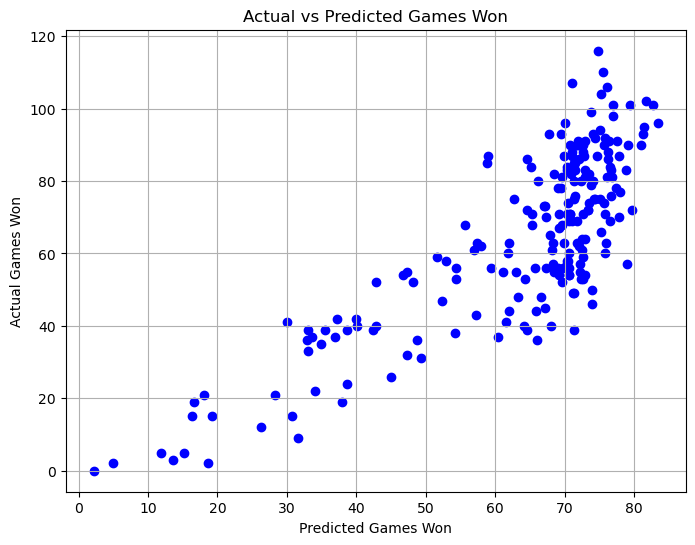

In [45]:
# Scatter plot of actual vs predicted games won
plt.figure(figsize=(8, 6))
plt.scatter(predict_values["predicted_games_won"], predict_values["actual_games_won"], color='blue')
plt.xlabel('Predicted Games Won')
plt.ylabel('Actual Games Won')
plt.title('Actual vs Predicted Games Won')
plt.grid(True)
plt.show()

# From 1920 to 1960

In [46]:
#We filter our subset from 1920 to 1960
df20_60 = df[(df['Year'] >= 1920) & (df['Year'] <= 1960)]

df20_60

,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
703,1920,BOS,BOS,5,154,72,81,650,5199,1397,...,6,4185,1481,39,461,481,183,131.0,0.97,Boston Red Sox
704,1920,BRO,LAD,1,155,93,61,660,5399,1493,...,10,4281,1381,25,327,553,226,118.0,0.96,Brooklyn Robins
705,1920,BSN,ATL,7,153,62,90,523,5218,1358,...,6,4158,1464,39,415,368,239,125.0,0.96,Boston Braves
706,1920,CHA,CHW,2,154,96,58,794,5328,1574,...,10,4158,1467,45,405,438,194,142.0,0.96,Chicago White Sox
707,1920,CHN,CHC,5,154,75,79,619,5117,1350,...,9,4164,1459,37,382,508,225,112.0,0.96,Chicago Cubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1960,PHI,PHI,8,154,59,95,546,5169,1235,...,16,4125,1423,133,439,736,155,129.0,0.97,Philadelphia Phillies
1355,1960,PIT,PIT,1,155,95,59,734,5406,1493,...,33,4197,1363,105,386,811,128,163.0,0.97,Pittsburgh Pirates
1356,1960,SFN,SFG,5,156,79,75,671,5324,1357,...,26,4188,1288,107,512,897,165,117.0,0.97,San Francisco Giants
1357,1960,SLN,STL,3,155,86,68,639,5187,1317,...,30,4113,1316,127,511,906,141,152.0,0.97,St. Louis Cardinals


In [47]:
# Convert non-numeric columns to numeric if possible
df20_60_numeric = df20_60.apply(pd.to_numeric, errors='coerce')

In [48]:
# Remove non-numeric columns
df20_60_numeric=df20_60_numeric.dropna(axis=1)


In [49]:
#correlation coefficients between all the variables and Games Won between 1920 to 1960
df20_60_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.000846,0.189423,0.010692,0.010786,-0.266526,-0.225335,-0.593521,-0.475833,-0.654101,...,0.194965,0.568528,0.165195,-0.563868,0.707125,0.391619,0.743800,-0.705631,0.323348,0.562170
Final_Standing,-0.000846,1.000000,-0.098972,-0.943757,0.942197,-0.603756,-0.232830,-0.399660,-0.257100,-0.232379,...,-0.508142,-0.372043,-0.363982,0.461592,0.115829,0.226013,-0.284405,0.316408,-0.062809,-0.303000
Games_Played,0.189423,-0.098972,1.000000,0.124491,-0.062669,0.051285,0.385212,0.025391,-0.005340,-0.020012,...,0.125789,0.122419,0.679439,-0.038285,0.121942,0.115308,0.225959,-0.114018,0.108227,0.151084
Games_Won,0.010692,-0.943757,0.124491,1.000000,-0.996320,0.630446,0.238560,0.406878,0.258201,0.249142,...,0.533875,0.397917,0.398372,-0.494073,-0.119464,-0.243707,0.315247,-0.342777,0.065158,0.322760
Games_Lost,0.010786,0.942197,-0.062669,-0.996320,1.000000,-0.631864,-0.221396,-0.410626,-0.264570,-0.254123,...,-0.529343,-0.385418,-0.356303,0.491071,0.140546,0.251879,-0.292402,0.332390,-0.051248,-0.311575
Runs_Scored,-0.266526,-0.603756,0.051285,0.630446,-0.631864,1.000000,0.524349,0.802339,0.647227,0.448048,...,-0.009247,0.159890,0.038133,0.168199,0.020879,0.012314,0.026334,0.021962,0.039294,-0.037528
At_Bats,-0.225335,-0.232830,0.385212,0.238560,-0.221396,0.524349,1.000000,0.707583,0.540436,0.304883,...,-0.071588,-0.066742,0.419476,0.324714,-0.049727,-0.052644,-0.049842,0.166124,0.017137,-0.101053
Hits,-0.593521,-0.399660,0.025391,0.406878,-0.410626,0.802339,0.707583,1.000000,0.739294,0.624689,...,-0.117963,-0.127686,0.033802,0.433407,-0.258796,-0.216568,-0.285154,0.332321,-0.094417,-0.268126
Doubles,-0.475833,-0.257100,-0.005340,0.258201,-0.264570,0.647227,0.540436,0.739294,1.000000,0.416870,...,-0.163088,-0.161769,-0.057056,0.433019,-0.225379,-0.081022,-0.251860,0.276801,-0.076204,-0.228043
Triples,-0.654101,-0.232379,-0.020012,0.249142,-0.254123,0.448048,0.304883,0.624689,0.416870,1.000000,...,-0.097986,-0.229778,0.004874,0.315334,-0.450999,-0.286644,-0.389692,0.441719,-0.167724,-0.366472


In [50]:
# Select the training and test data sets from the original data. Note 30% of the data is selected testing and 70% for training

x_train, x_test, y_train, y_test = train_test_split(df20_60, df20_60['Games_Won'],test_size=0.3, random_state=0)

In [51]:
#Calculate descriptive statistics for the training data set
x_train.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,1939.721133,4.429194,154.335512,77.093682,76.235294,716.958606,5314.642702,1439.769063,243.433551,57.710240,...,9.470588,15.758170,4130.843137,1436.771242,89.673203,517.241830,546.481481,169.525054,150.936819,0.967756
std,11.759072,2.290310,1.480832,14.427425,14.298028,110.425380,109.163867,110.679043,37.733284,18.394302,...,4.207073,7.413866,61.380421,112.926407,33.390340,87.504837,128.428124,33.158560,19.606788,0.005721
min,1920.000000,1.000000,148.000000,42.000000,43.000000,394.000000,4949.000000,1174.000000,153.000000,19.000000,...,1.000000,4.000000,3891.000000,1198.000000,26.000000,257.000000,310.000000,103.000000,95.000000,0.950000
25%,1929.000000,2.000000,154.000000,66.000000,65.500000,647.000000,5236.000000,1361.500000,216.000000,44.000000,...,6.000000,10.000000,4086.000000,1359.500000,66.000000,454.000000,445.000000,145.000000,136.500000,0.960000
50%,1940.000000,4.000000,154.000000,78.000000,76.000000,705.000000,5301.000000,1431.000000,240.000000,56.000000,...,9.000000,15.000000,4134.000000,1430.000000,84.000000,513.000000,531.000000,168.000000,150.000000,0.970000
75%,1950.000000,6.000000,155.000000,88.000000,86.500000,785.500000,5380.000000,1512.000000,266.000000,70.000000,...,12.000000,20.000000,4173.000000,1509.000000,110.000000,575.000000,633.000000,190.000000,164.500000,0.970000
max,1960.000000,8.000000,158.000000,111.000000,112.000000,1067.000000,5667.000000,1783.000000,373.000000,116.000000,...,26.000000,42.000000,4299.000000,1993.000000,185.000000,812.000000,906.000000,294.000000,214.000000,0.980000


In [52]:
#Calculate descriptive statistics for the test data set
x_test.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,1940.649746,4.593909,154.314721,75.705584,77.705584,701.695431,5307.482234,1430.182741,238.548223,57.284264,...,9.781726,15.634518,4128.548223,1436.279188,91.989848,513.883249,556.944162,167.664975,149.604061,0.967817
std,12.035414,2.273980,1.485452,13.951250,13.831516,95.807410,107.022103,101.064372,38.422516,19.560487,...,4.549958,7.024623,64.928013,113.425190,36.224638,93.453970,132.266205,33.776719,20.547992,0.005786
min,1920.000000,1.000000,147.000000,38.000000,48.000000,494.000000,4898.000000,1205.000000,162.000000,19.000000,...,2.000000,2.000000,3906.000000,1163.000000,25.000000,280.000000,349.000000,99.000000,94.000000,0.950000
25%,1930.000000,3.000000,154.000000,65.000000,67.000000,636.000000,5234.000000,1354.000000,212.000000,44.000000,...,7.000000,11.000000,4092.000000,1367.000000,63.000000,449.000000,466.000000,145.000000,138.000000,0.960000
50%,1941.000000,5.000000,154.000000,77.000000,76.000000,707.000000,5302.000000,1415.000000,233.000000,54.000000,...,9.000000,14.000000,4125.000000,1428.000000,86.000000,512.000000,544.000000,166.000000,150.000000,0.970000
75%,1951.000000,6.000000,155.000000,86.000000,89.000000,751.000000,5371.000000,1499.000000,261.000000,68.000000,...,13.000000,20.000000,4173.000000,1502.000000,121.000000,582.000000,639.000000,189.000000,162.000000,0.970000
max,1960.000000,8.000000,158.000000,106.000000,115.000000,981.000000,5586.000000,1693.000000,353.000000,122.000000,...,26.000000,42.000000,4281.000000,1768.000000,187.000000,758.000000,1122.000000,291.000000,217.000000,0.980000


In [55]:
#building of a model with highest variables correlated with Games Won between 1920 to 1960
lm3 = smf.ols(formula="Games_Won ~ Runs_Scored + Shutout -1", data=df20_60).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          3.101e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:39:29   Log-Likelihood:                         -2292.3
No. Observations:                 656   AIC:                                      4589.
Df Residuals:                     654   BIC:                                      4598.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0838      0.001     83.984      0.000       0.082       0.086
Shutout         1.7761      0.069     25.916      0.000       1.642       1.911
==============================================================================
Omnibus:                        2.442   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.268
Skew:                          -0.111   Prob(JB):                        0.322
Kurtosis:                       3.183   Cond. No.                         158.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


4a. Statistical significance of the overall model
The overall model is statistically significant. This is because the p-value of the F-statistic (Prob (F-statistic)) is 0.00, which is less than  significance level of 0.05.

4b. Statistical significance of each coefficient, including the intercept
Both the intercept and the coefficient Runs_Scored are statistically significant. This is because all their p-values are less than 0.05. Shutout is not statistically significant.


4C. Model is normally distrubuted .

In [56]:
lm3_predict=lm3.predict(x_test)

lm3_predict.describe()

count    197.000000
mean      76.192217
std       11.749683
min       50.289495
25%       67.803946
50%       75.196253
75%       84.233380
max      116.591061
dtype: float64

In [57]:
predict_values=pd.concat([x_test["Games_Won"], x_test['Team'],lm3_predict],axis=1).set_index('Team')
predict_values.columns=["actual_games_won","predicted_games_won"]
predict_values["residual"]=predict_values["actual_games_won"]-predict_values["predicted_games_won"]

predict_values.head()

,actual_games_won,predicted_games_won,residual
Team,,,
SLN,71,67.939940,3.060060
PIT,57,67.740640,-10.740640
SLN,75,72.566067,2.433933
DET,93,105.451898,-12.451898
CIN,80,77.375668,2.624332


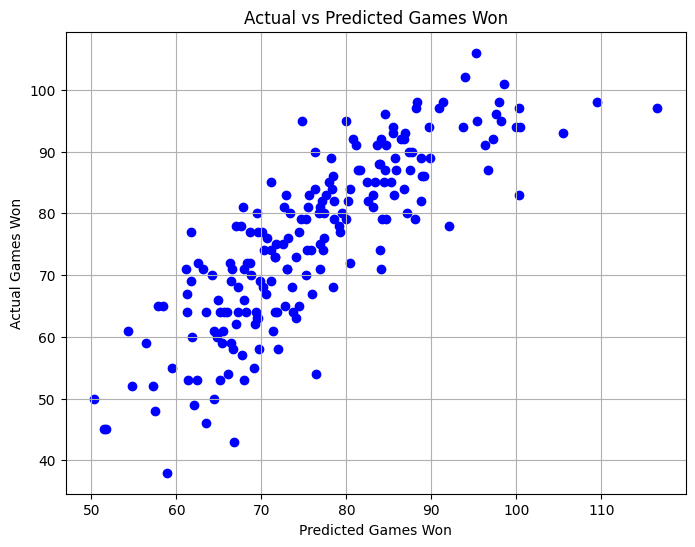

In [ ]:
# Scatter plot of actual vs predicted games won
plt.figure(figsize=(8, 6))
plt.scatter(predict_values["predicted_games_won"], predict_values["actual_games_won"], color='blue')
plt.xlabel('Predicted Games Won')
plt.ylabel('Actual Games Won')
plt.title('Actual vs Predicted Games Won')
plt.grid(True)
plt.show()

# FROM 1960 TO 1990

In [58]:
#We filter our subset from 1960 to 1990
df60_90 = df[(df['Year'] >= 1960) & (df['Year'] <= 1990)]

df60_90

,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
1343,1960,BAL,BAL,2,154,89,65,682,5170,1307,...,22,4125,1222,117,552,785,107,172.0,0.98,Baltimore Orioles
1344,1960,BOS,BOS,7,154,65,89,658,5215,1359,...,23,4083,1440,127,580,767,140,156.0,0.97,Boston Red Sox
1345,1960,CHA,CHW,3,154,87,67,741,5191,1402,...,26,4143,1338,127,533,695,109,175.0,0.98,Chicago White Sox
1346,1960,CHN,CHC,7,156,60,94,634,5311,1293,...,25,4206,1393,152,565,805,143,133.0,0.97,Chicago Cubs
1347,1960,CIN,CIN,6,154,67,87,640,5289,1324,...,35,4170,1417,134,442,740,125,155.0,0.97,Cincinnati Reds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1990,SEA,SEA,5,162,77,85,640,5474,1419,...,41,4329,1319,120,606,1064,130,152.0,0.97,Seattle Mariners
2069,1990,SFN,SFG,3,162,85,77,719,5573,1459,...,45,4338,1477,131,553,788,107,148.0,0.98,San Francisco Giants
2070,1990,SLN,STL,6,162,70,92,599,5462,1398,...,39,4329,1432,98,475,833,129,114.0,0.97,St. Louis Cardinals
2071,1990,TEX,TEX,3,162,83,79,676,5469,1416,...,36,4332,1343,113,623,997,133,161.0,0.97,Texas Rangers


In [59]:
# Convert non-numeric columns to numeric if possible
df60_90_numeric = df60_90.apply(pd.to_numeric, errors='coerce')

In [60]:
# Remove non-numeric columns
df60_90_numeric = df60_90_numeric.dropna(axis=1)

In [61]:
#correlation coefficients between all the variables and Games Won between 1960 to 1990
df60_90_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.215150,-0.064221,-0.022225,-0.022359,0.127479,-0.032791,0.130501,0.421261,-0.151876,...,-0.221343,0.321465,-0.077533,0.131798,-0.040072,0.021313,-0.112753,-0.263833,-0.055544,0.227936
Final_Standing,-0.215150,1.000000,0.019039,-0.759686,0.776072,-0.438587,-0.031928,-0.274490,-0.273384,-0.092971,...,-0.329770,-0.401215,-0.033483,0.230332,0.222843,0.268166,-0.052045,0.305818,0.023341,-0.263642
Games_Played,-0.064221,0.019039,1.000000,0.412684,0.404104,0.513379,0.973249,0.723187,0.423987,0.211822,...,0.129196,0.221497,0.987896,0.722502,0.388043,0.444293,0.527133,0.415014,0.434891,-0.048797
Games_Won,-0.022225,-0.759686,0.412684,1.000000,-0.665723,0.672123,0.455421,0.573141,0.407826,0.226863,...,0.451290,0.502047,0.464001,0.032424,-0.011753,-0.164312,0.347724,-0.148223,0.158119,0.250331
Games_Lost,-0.022359,0.776072,0.404104,-0.665723,1.000000,-0.253619,0.339295,0.017468,-0.058076,-0.057490,...,-0.349280,-0.319674,0.342487,0.560377,0.329586,0.531170,0.081021,0.485433,0.198085,-0.287916
Runs_Scored,0.127479,-0.438587,0.513379,0.672123,-0.253619,1.000000,0.619035,0.845862,0.694609,0.280874,...,-0.073375,0.378181,0.512705,0.523484,0.484276,0.201727,0.221284,0.041086,0.339798,0.099210
At_Bats,-0.032791,-0.031928,0.973249,0.455421,0.339295,0.619035,1.000000,0.835225,0.523000,0.270323,...,0.095563,0.244755,0.974558,0.756890,0.414365,0.430787,0.501812,0.392935,0.461389,-0.037279
Hits,0.130501,-0.274490,0.723187,0.573141,0.017468,0.845862,0.835225,1.000000,0.730266,0.372716,...,0.005570,0.315393,0.721549,0.687789,0.377021,0.282592,0.285453,0.204308,0.443152,0.033945
Doubles,0.421261,-0.273384,0.423987,0.407826,-0.058076,0.694609,0.523000,0.730266,1.000000,0.288251,...,-0.104484,0.370840,0.414472,0.491138,0.287163,0.175487,0.153588,-0.028679,0.244274,0.140644
Triples,-0.151876,-0.092971,0.211822,0.226863,-0.057490,0.280874,0.270323,0.372716,0.288251,1.000000,...,0.041925,0.092524,0.221119,0.187392,-0.007283,0.010009,0.014333,0.135862,0.152796,-0.070435


In [62]:
# Select the training and test data sets from the original data. Note 30% of the data is selected testing and 70% for training

x_train, x_test, y_train, y_test = train_test_split(df60_90, df60_90['Games_Won'],test_size=0.3, random_state=0)

In [63]:
#Calculate descriptive statistics for the training data set
x_train.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,1975.904110,4.054795,159.802348,79.978474,79.637965,668.197652,5425.397260,1385.309198,225.272016,36.919765,...,11.203523,33.571429,4297.667319,1385.874755,126.759295,511.919765,863.792564,136.078278,149.031311,0.973209
std,8.844883,2.233640,9.599125,12.300547,12.193539,91.572911,337.304158,119.112676,34.188554,11.183120,...,4.409623,9.099789,260.656695,116.707595,28.211366,74.486500,128.969840,21.800471,20.367000,0.004756
min,1960.000000,1.000000,103.000000,41.000000,46.000000,348.000000,3493.000000,868.000000,133.000000,11.000000,...,1.000000,12.000000,2767.000000,840.000000,40.000000,268.000000,404.000000,65.000000,81.000000,0.960000
25%,1968.000000,2.000000,161.500000,72.000000,72.000000,616.000000,5419.000000,1328.500000,203.000000,29.000000,...,8.000000,27.000000,4306.500000,1337.500000,108.000000,468.000000,784.000000,122.000000,136.000000,0.970000
50%,1977.000000,4.000000,162.000000,81.000000,80.000000,673.000000,5489.000000,1397.000000,224.000000,35.000000,...,11.000000,33.000000,4350.000000,1402.000000,126.000000,507.000000,870.000000,137.000000,150.000000,0.970000
75%,1983.500000,6.000000,162.000000,89.000000,88.000000,730.000000,5545.000000,1459.000000,248.000000,43.500000,...,14.000000,41.000000,4383.000000,1455.000000,143.000000,560.000000,941.000000,150.000000,162.000000,0.980000
max,1990.000000,10.000000,165.000000,109.000000,112.000000,896.000000,5767.000000,1633.000000,326.000000,79.000000,...,28.000000,64.000000,4518.000000,1636.000000,226.000000,770.000000,1221.000000,192.000000,215.000000,0.980000


In [65]:
#Calculate descriptive statistics for the test data set
x_test.describe()

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1976.187215,3.995434,158.716895,78.849315,79.643836,661.739726,5388.091324,1373.831050,225.342466,37.114155,...,10.812785,32.210046,4268.063927,1372.694064,124.187215,521.648402,852.881279,134.333333,148.689498,0.973333
std,8.428143,2.181023,11.594931,13.297242,13.323467,94.137616,407.137232,135.892476,33.554236,10.013327,...,4.824120,10.262682,310.154572,137.651776,29.603444,77.942049,138.009089,22.281834,19.941070,0.005008
min,1960.000000,1.000000,103.000000,37.000000,42.000000,329.000000,3521.000000,797.000000,119.000000,16.000000,...,2.000000,10.000000,2826.000000,827.000000,52.000000,287.000000,388.000000,72.000000,74.000000,0.960000
25%,1970.000000,2.000000,161.000000,70.000000,71.000000,608.000000,5398.500000,1333.500000,203.000000,29.500000,...,7.000000,25.000000,4294.500000,1318.000000,101.000000,476.500000,773.500000,121.000000,137.000000,0.970000
50%,1976.000000,4.000000,162.000000,81.000000,79.000000,676.000000,5489.000000,1397.000000,225.000000,36.000000,...,10.000000,31.000000,4338.000000,1396.000000,125.000000,519.000000,863.000000,133.000000,149.000000,0.970000
75%,1983.000000,6.000000,162.000000,87.500000,87.000000,723.500000,5540.500000,1451.000000,251.000000,44.000000,...,14.000000,39.000000,4378.500000,1459.000000,146.500000,572.000000,935.000000,146.500000,162.000000,0.980000
max,1990.000000,10.000000,164.000000,109.000000,120.000000,891.000000,5733.000000,1620.000000,298.000000,68.000000,...,30.000000,68.000000,4479.000000,1593.000000,199.000000,760.000000,1217.000000,210.000000,192.000000,0.980000


In [66]:
#building of a model with highest variables correlated with Games Won between 1960 to 1990
lm4 = smf.ols(formula="Games_Won ~ Runs_Scored + Saves -1", data=df60_90).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.913e+04
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                        0.00
Time:                        00:40:08   Log-Likelihood:                         -2636.3
No. Observations:                 730   AIC:                                      5277.
Df Residuals:                     728   BIC:                                      5286.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0986      0.002     51.096      0.000       0.095       0.102
Saves           0.4125      0.038     10.964      0.000       0.339       0.486
==============================================================================
Omnibus:                        6.404   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.623
Skew:                           0.149   Prob(JB):                       0.0601
Kurtosis:                       2.689   Cond. No.                         76.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4a. Statistical significance of the overall model
The overall model is statistically significant. This is because the p-value of the F-statistic 0.00 is less than 0.05.
4b. Statistical significance of each coefficient ,including the intercept
Both the intercept and  all coefficients  are statistically significant. This is because all their p-values are less than 0.05.
4C. Model is normally distrubuted .

In [67]:
lm4_predict=lm4.predict(x_test)

lm4_predict.describe()

count    219.000000
mean      78.509895
std       11.510555
min       39.852277
25%       71.976826
50%       80.266984
75%       86.268202
max      107.207312
dtype: float64

In [68]:
predict_values=pd.concat([x_test["Games_Won"], x_test['Team'],lm4_predict],axis=1).set_index('Team')
predict_values.columns=["actual_games_won","predicted_games_won"]
predict_values["residual"]=predict_values["actual_games_won"]-predict_values["predicted_games_won"]

predict_values.head()

,actual_games_won,predicted_games_won,residual
Team,,,
SLN,87,69.370237,17.629763
MON,52,66.026521,-14.026521
SLN,86,75.356976,10.643024
SFN,85,88.564619,-3.564619
TEX,94,88.385707,5.614293


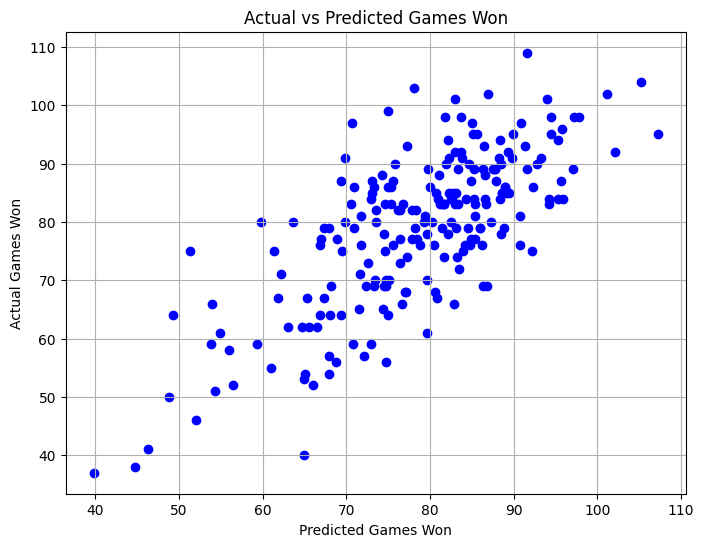

In [ ]:
# Scatter plot of actual vs predicted games won
plt.figure(figsize=(8, 6))
plt.scatter(predict_values["predicted_games_won"], predict_values["actual_games_won"], color='blue')
plt.xlabel('Predicted Games Won')
plt.ylabel('Actual Games Won')
plt.title('Actual vs Predicted Games Won')
plt.grid(True)
plt.show()

# FROM 1990 TO 2010

In [69]:
#From 1990 to 2010
df90_10 = df[(df['Year'] >= 1990) & (df['Year'] <= 2010)]

df90_10

,Year,Team,Franchise,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name
2047,1990,ATL,ATL,6,162,65,97,682,5504,1376,...,30,4287,1527,128,579,938,158,133.0,0.970,Atlanta Braves
2048,1990,BAL,BAL,5,161,76,85,669,5410,1328,...,43,4305,1445,161,537,776,91,151.0,0.980,Baltimore Orioles
2049,1990,BOS,BOS,1,162,88,74,699,5516,1502,...,44,4326,1439,92,519,997,123,154.0,0.980,Boston Red Sox
2050,1990,CAL,ANA,4,162,80,82,690,5570,1448,...,42,4362,1482,106,544,944,140,186.0,0.970,California Angels
2051,1990,CHA,CHW,2,162,94,68,682,5402,1393,...,68,4347,1313,106,548,914,124,169.0,0.980,Chicago White Sox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2010,SLN,STL,2,162,86,76,736,5542,1456,...,32,4361,1412,133,477,1094,99,172.0,0.984,St. Louis Cardinals
2651,2010,TBA,TBD,1,162,96,66,802,5439,1343,...,51,4361,1347,175,478,1189,85,134.0,0.986,Tampa Bay Rays
2652,2010,TEX,TEX,1,162,90,72,787,5635,1556,...,46,4366,1355,162,551,1181,105,133.0,0.982,Texas Rangers
2653,2010,TOR,TOR,4,162,85,77,755,5495,1364,...,45,4322,1407,150,539,1184,92,172.0,0.985,Toronto Blue Jays


In [70]:
# Convert non-numeric columns to numeric if possible
df90_10_numeric = df90_10.apply(pd.to_numeric, errors='coerce')

In [71]:
# Remove non-numeric columns
df90_10_numeric = df90_10_numeric.dropna(axis=1)

In [ ]:
#correlation coefficients between all the variables and Games Won between 1990 to 2010
df90_10_numeric.corr(method='pearson')

,Year,Final_Standing,Games_Played,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,Triples,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.102183,0.287844,0.123664,0.123898,0.227369,0.306147,0.277135,0.488262,-0.058134,...,0.085466,0.006442,0.267082,0.262800,0.399072,0.067532,0.512945,-0.309249,0.188359,0.603883
Final_Standing,-0.102183,1.000000,0.052529,-0.741113,0.788517,-0.431553,0.015545,-0.194709,-0.165722,0.008569,...,-0.283777,-0.458741,0.005764,0.298186,0.162129,0.311767,-0.266053,0.316957,0.177746,-0.243729
Games_Played,0.287844,0.052529,1.000000,0.431287,0.426342,0.456536,0.977186,0.756702,0.521019,0.151030,...,0.336133,0.375009,0.991657,0.715717,0.336367,0.426248,0.546128,0.287454,0.476718,0.159657
Games_Won,0.123664,-0.741113,0.431287,1.000000,-0.632107,0.627615,0.451233,0.548153,0.391859,0.035709,...,0.526188,0.702968,0.482071,-0.005547,-0.117280,-0.151105,0.491782,-0.165894,0.052713,0.282799
Games_Lost,0.123898,0.788517,0.426342,-0.632107,1.000000,-0.237626,0.386741,0.100145,0.054205,0.094372,...,-0.237612,-0.383305,0.368332,0.619475,0.405548,0.517503,-0.023376,0.412501,0.356514,-0.145231
Runs_Scored,0.227369,-0.431553,0.456536,0.627615,-0.237626,1.000000,0.566294,0.812417,0.666345,0.057284,...,0.035839,0.273339,0.459865,0.483065,0.456906,0.233159,0.341290,-0.018373,0.292467,0.200377
At_Bats,0.306147,0.015545,0.977186,0.451233,0.386741,0.566294,1.000000,0.856838,0.603605,0.154711,...,0.286745,0.351569,0.976522,0.754550,0.395554,0.441981,0.541776,0.255382,0.494612,0.180787
Hits,0.277135,-0.194709,0.756702,0.548153,0.100145,0.812417,0.856838,1.000000,0.715815,0.173165,...,0.161952,0.322362,0.756826,0.676103,0.441132,0.345346,0.449514,0.105993,0.433575,0.207507
Doubles,0.488262,-0.165722,0.521019,0.391859,0.054205,0.666345,0.603605,0.715815,1.000000,0.071823,...,0.099849,0.165411,0.512710,0.499351,0.408222,0.220238,0.454268,-0.044384,0.310247,0.336496
Triples,-0.058134,0.008569,0.151030,0.035709,0.094372,0.057284,0.154711,0.173165,0.071823,1.000000,...,0.064201,0.055334,0.149050,0.106721,0.000927,0.049534,-0.010431,0.084912,0.049750,-0.015880


In [ ]:
# Select the training and test data sets from the original data. Note 30% of the data is selected testing and 70% for training

x_train, x_test, y_train, y_test = train_test_split(df90_10, df90_10['Games_Won'],test_size=0.3, random_state=0)

In [ ]:
#Calculate descriptive statistics for the training data set
x_train.describe()

In [ ]:
#Calculate descriptive statistics for the test data set
x_test.describe()

In [ ]:
#building of a model with highest variables correlated with Games Won between 1990 to 2010
lm4 = smf.ols(formula="Games_Won ~ Runs_Scored + Hits + Saves + Shutout -1", data=df90_10).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.355e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:51:20   Log-Likelihood:                         -1885.9
No. Observations:                 608   AIC:                                      3780.
Df Residuals:                     604   BIC:                                      3797.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0797      0.004     20.318      0.000       0.072       0.087
Hits           -0.0127      0.002     -5.727      0.000      -0.017      -0.008
Saves           0.7154      0.032     22.674      0.000       0.653       0.777
Shutout         1.1444      0.062     18.383      0.000       1.022       1.267
==============================================================================
Omnibus:                        8.645   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.879
Skew:                           0.291   Prob(JB):                       0.0118
Kurtosis:                       2.892   Cond. No.                         473.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 4a. Statistical significance of the overall model
The overall model is statistically significant. This is because the p-value of the F-statistic 0.00 is less than 0.05.
4b. Statistical significance of each coefficient ,including the intercept
Both the intercept and  all coefficients  are statistically significant. This is because all their p-values are less than 0.05.
4C. Model is normally distrubuted .

In [ ]:
lm4_predict=lm4.predict(x_test)

lm4_predict.describe()

count    183.000000
mean      80.430563
std       10.805267
min       42.758900
25%       74.013781
50%       80.314430
75%       87.186345
max      105.050480
dtype: float64

In [ ]:
predict_values=pd.concat([x_test["Games_Won"], x_test['Team'],lm4_predict],axis=1).set_index('Team')
predict_values.columns=["actual_games_won","predicted_games_won"]
predict_values["residual"]=predict_values["actual_games_won"]-predict_values["predicted_games_won"]

predict_values.head()

,actual_games_won,predicted_games_won,residual
Team,,,
TOR,75,73.705074,1.294926
ATL,98,93.511690,4.488310
LAA,100,100.787030,-0.787030
CIN,78,78.133075,-0.133075
CAL,72,74.506002,-2.506002


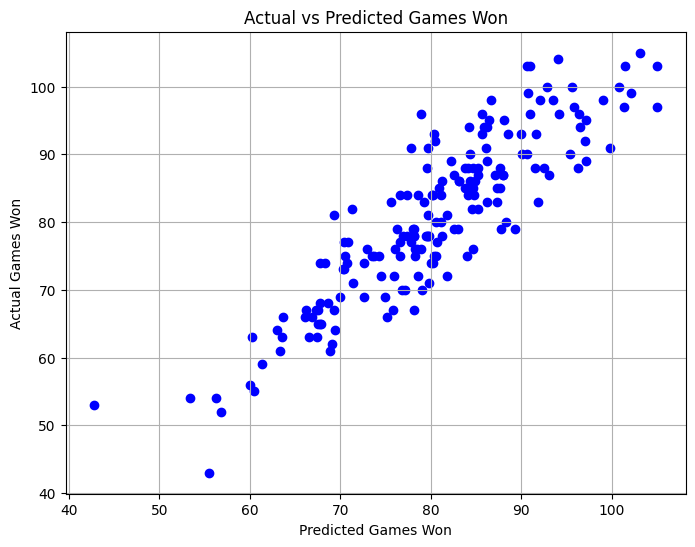

In [ ]:
# Scatter plot of actual vs predicted games won
plt.figure(figsize=(8, 6))
plt.scatter(predict_values["predicted_games_won"], predict_values["actual_games_won"], color='blue')
plt.xlabel('Predicted Games Won')
plt.ylabel('Actual Games Won')
plt.title('Actual vs Predicted Games Won')
plt.grid(True)
plt.show()